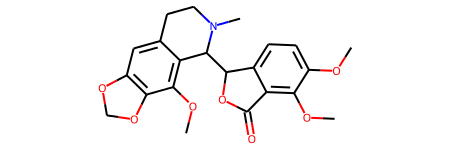

In [20]:
import graphs
from rdkit import Chem

m = Chem.MolFromSmiles('CN1CCC2=CC3=C(C(=C2C1C4C5=C(C(=C(C=C5)OC)OC)C(=O)O4)OC)OCO3')
m

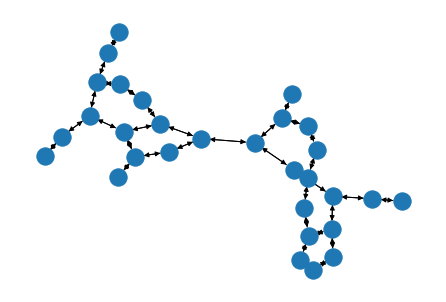

In [21]:
import networkx as nx

g = graphs.mol_to_nx(m)
nx.draw(g)

In [22]:
for n, d in g.nodes(data=True):
    print(n,d)

0 {'a_type': 'C', 'a_num': 6, 'acceptor': 0, 'donor': 0, 'aromatic': False, 'hybridization': rdkit.Chem.rdchem.HybridizationType.SP3, 'num_h': 3}
1 {'a_type': 'N', 'a_num': 7, 'acceptor': 0, 'donor': 1, 'aromatic': False, 'hybridization': rdkit.Chem.rdchem.HybridizationType.SP3, 'num_h': 0}
2 {'a_type': 'C', 'a_num': 6, 'acceptor': 0, 'donor': 0, 'aromatic': False, 'hybridization': rdkit.Chem.rdchem.HybridizationType.SP3, 'num_h': 2}
3 {'a_type': 'C', 'a_num': 6, 'acceptor': 0, 'donor': 0, 'aromatic': False, 'hybridization': rdkit.Chem.rdchem.HybridizationType.SP3, 'num_h': 2}
4 {'a_type': 'C', 'a_num': 6, 'acceptor': 0, 'donor': 0, 'aromatic': True, 'hybridization': rdkit.Chem.rdchem.HybridizationType.SP2, 'num_h': 0}
5 {'a_type': 'C', 'a_num': 6, 'acceptor': 0, 'donor': 0, 'aromatic': True, 'hybridization': rdkit.Chem.rdchem.HybridizationType.SP2, 'num_h': 1}
6 {'a_type': 'C', 'a_num': 6, 'acceptor': 0, 'donor': 0, 'aromatic': True, 'hybridization': rdkit.Chem.rdchem.HybridizationTyp

In [10]:
import numpy as np
np.log10(0.999 + 1) * 30

9.02438382354351

In [19]:
g.edges()

OutEdgeView([(0, 1), (1, 0), (1, 2), (1, 13), (2, 1), (2, 3), (3, 2), (3, 4), (3, 8), (4, 3), (4, 5), (5, 4), (5, 6), (5, 10), (6, 5), (6, 7), (7, 6), (7, 8), (8, 3), (8, 7), (8, 9), (8, 10), (9, 8), (10, 5), (10, 8), (10, 11), (10, 12), (11, 10), (12, 10), (13, 1)])

In [2]:
from ..molxspec import utils

ImportError: attempted relative import with no known parent package

In [2]:
from transformers import AutoModelWithLMHead
from molxspec import utils
model = AutoModelWithLMHead.from_pretrained(utils.CHEMBERTA_MODEL)
model.lm_head.dense.in_features

768

In [3]:
from molxspec import chemberta
tokenizer = chemberta.chemberta_tokenizer()

In [9]:
tok = tokenizer(['CCC', 'COOOCCCC', 'CC'], return_tensors='pt',
        padding='max_length',
        max_length=300,
        truncation=True
        )

model = chemberta.get_model()

x = {k: v.squeeze(dim=1) for k, v in tok.items()}
mol_rep = model(**x, output_hidden_states=True).hidden_states[-1].mean(axis=1).numpy()
mol_rep

array([[ 1.5580536 ,  1.1671791 , -1.149847  , ..., -0.24927579,
        -0.49077922,  1.328594  ],
       [ 0.22153404,  0.52524614, -1.1283845 , ..., -1.1821485 ,
        -0.17209087,  0.86224324],
       [ 1.2833173 ,  1.3344079 , -1.0416415 , ..., -0.3903268 ,
        -0.8300343 ,  1.1791661 ]], dtype=float32)

[0 0 0 0 1] [0 0 1 0 0 0 0 0 0]


Predicting (batches of 1024): 100%|██████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 115.63it/s]


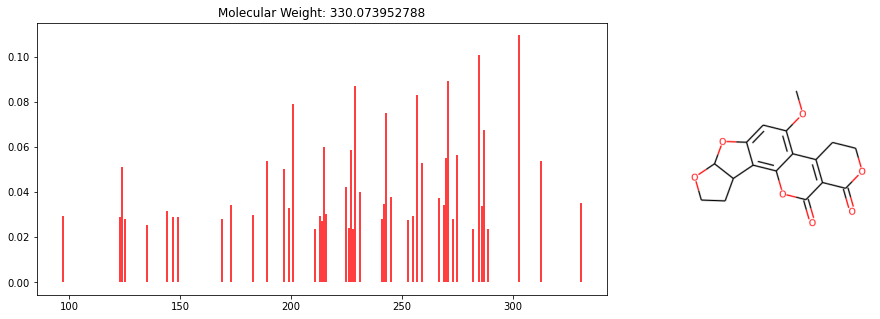

In [5]:
from molxspec import mol2spec
#@markdown Enter comma-separated smiles
smiles = 'COC1=C2C3=C(C(=O)OCC3)C(=O)OC2=C4C5CCOC5OC4=C1' #@param {type:"string"}
model = 'bert' #@param ["mlp", "bert", "gcn", "egnn"]
adduct_type = 'M+H' #@param  ['[M+H]+', '[M+Na]+', 'M+H', 'M-H', '[M-H2O+H]+', '[M-H]-', '[M+NH4]+', 'M+NH4', 'M+Na']
fragmentation_level = 0 #@param {type:"slider", min:0, max:4, step:1}

results = mol2spec.predict(
    smiles.split(','), 
    -fragmentation_level,
     adduct_type, 
     mol2spec.ModelType(model),
    force_relative=False
     )

import numpy as np
from matplotlib import pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Descriptors import ExactMolWt


def plot_spec(smiles, spec):
    f, axarr = plt.subplots(nrows=1,  ncols=2, gridspec_kw={'width_ratios':[3, 1]}, figsize=(15, 5))
    mol = Chem.MolFromSmiles(smiles)
    axarr[0].vlines(spec[:, 0], ymin=0, ymax=spec[:, 1], color='red')
    axarr[1].imshow(Draw.MolToImage(mol))
    axarr[1].axis('off')
    axarr[0].set_title(f'Molecular Weight: {ExactMolWt(mol)}')


for _smiles, _spec in results.items():
    plot_spec(_smiles, _spec)  